In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the dataset

In [2]:
data = pd.read_csv('sgemm_product.csv')

In [3]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


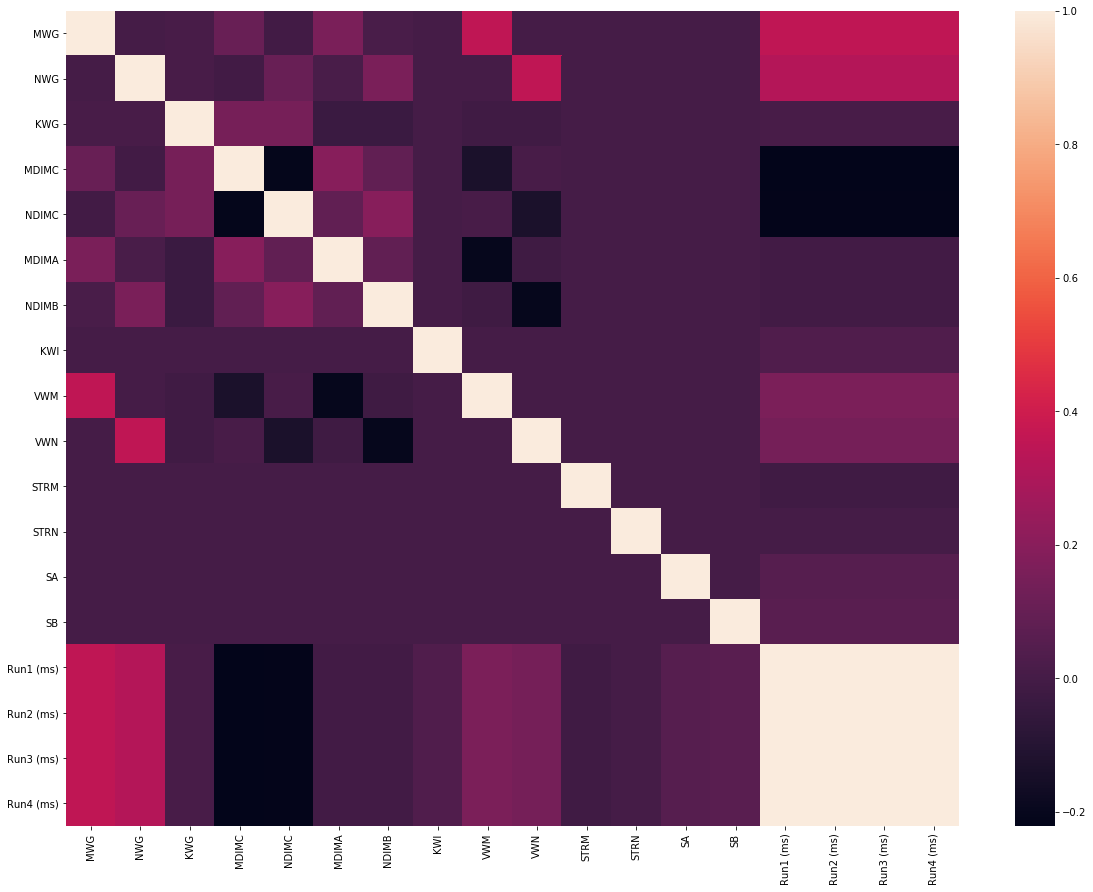

In [4]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr())

In [5]:
data['Run'] = (data['Run1 (ms)'] + data['Run2 (ms)'] + data['Run3 (ms)'] + data['Run4 (ms)'] )/4

In [6]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [7]:
data = data.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


### Preprocessing the dataset

#### Taking features and target variables

In [8]:
data.isna().sum()

MWG      0
NWG      0
KWG      0
MDIMC    0
NDIMC    0
MDIMA    0
NDIMB    0
KWI      0
VWM      0
VWN      0
STRM     0
STRN     0
SA       0
SB       0
Run      0
dtype: int64

In [12]:
X = data.iloc[:,:-1].values
print(X.shape[0])

241600


In [13]:
Y = data.iloc[:,-1].values
y = np.log(Y)
print(y.shape[0])

241600


#### Feature Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X = sc.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [15]:
np.mean(X, axis = 0)

array([0.57513718, 0.57513718, 0.59456954, 0.24732892, 0.24732892,
       0.39046358, 0.39046358, 0.5       , 0.20694418, 0.20694418,
       0.5       , 0.5       , 0.5       , 0.5       ])

In [16]:
np.std(X, axis = 0)

array([0.37918868, 0.37918868, 0.49097515, 0.32806858, 0.32806858,
       0.39122495, 0.39122495, 0.5       , 0.27910792, 0.27910792,
       0.5       , 0.5       , 0.5       , 0.5       ])

#### Train-test split of the dataset

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, 
                                                    random_state = 40)

In [18]:
print(X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0])

169120 169120 72480 72480


### Implementing the cost-function

In [19]:
# Cost Function MSE

def mse_cost(y_true, y_pred):
    
    assert (y_true.shape[0] == y_pred.shape[0]),"Dimension Mismatch"
    
    m = y_true.shape[0]
    J = np.sum(np.square(y_true - y_pred))/(2*m)
    return (J)

In [20]:
#Cost Function RMSE

def rmse_cost(y_true, y_pred):
    
    assert (y_true.shape[0] == y_pred.shape[0]),"Dimension Mismatch"
    
    m = y_true.shape[0]
    I = np.sqrt(np.sum(np.square(y_true - y_pred))/(2*m))
    return (I)

### Implementing Gradient Descent Algorithm

#### Implementing the function to calculate the predicted output

In [21]:
def output_lin_reg(X, theta):
    
    return (X @ theta)

In [35]:
def grad_des_lin_reg(X, y, alpha , it , tol ):
    
    assert (X.shape[0] == y.shape[0]), "Dimension Mismatch"
    
    m = X.shape[0]   # Number of training samples
    X = np.c_[np.ones(m),X] # Inserting a column of all ones 
    k = X.shape[1]   # number of predictors (including the dummy predictor)
    
    np.random.seed(32)
    beta = np.random.randn(k) # Initializing the model parameters with random values
    theta = np.random.randn(k) 
    costs = []
    count = 0
    
    for i in range(it):
        y_pred = output_lin_reg (X, theta)
        J = rmse_cost(y, y_pred)
        costs.append(J)
        del_theta = (-1)*(alpha/m)*(X.T @ (y_pred - y))
        theta += del_theta
        if np.linalg.norm(del_theta) <= tol:
            break
        count += 1
    
    return theta, costs, count,beta
    

### Running gradient descent algorithm

In [36]:
theta, costs, count,beta = grad_des_lin_reg(X_train, y_train, alpha = 0.03, it = 3000, tol = 0.00001)

In [37]:
print("theta: {}, ".format(beta))

theta: [-0.34889445  0.98370343  0.58092283  0.07028444  0.77753268  0.58195875
  1.47179053  1.66318101 -0.26117712 -0.68867681 -0.69492326  1.94042346
  1.80541519  0.45631385 -0.57481204], 


In [38]:
print("theta: {}, \n number of iterations = {}".format(theta, count))

theta: [ 3.86263268  1.49719843  1.17711662  0.1960955  -1.35461902 -1.3063491
  0.00554319  0.00614963 -0.02541197 -0.05469389 -0.14920599 -0.12796896
 -0.01583042 -0.187738   -0.0426499 ], 
 number of iterations = 3000


In [39]:
print("theta: {}, \n number of iterations ={}, ".format(costs,count))

theta: [2.6475372627757983, 2.399886792435381, 2.1876178118349583, 2.0066452682208644, 1.8532485719670364, 1.7240183104227844, 1.6158201204839067, 1.5257748155802007, 1.4512515761990525, 1.3898691688916012, 1.339499492538842, 1.2982684982273864, 1.2645513217954423, 1.2369605861531447, 1.2143285990644943, 1.1956852298828073, 1.1802335802157171, 1.1673253688919691, 1.1564374874572985, 1.1471506570954, 1.13913065623257, 1.1321122412558742, 1.1258856541111841, 1.1202854801433244, 1.115181560771298, 1.110471653838373, 1.1060755504565036, 1.1019303872952508, 1.0979869287572082, 1.0942066291004726, 1.0905593175048904, 1.0870213780692808, 1.0835743214300984, 1.0802036652739675, 1.0768980578903573, 1.0736485925814991, 1.0704482717249302, 1.067291588041434, 1.0641741975714019, 1.0610926643572307, 1.0580442611600929, 1.055026813944845, 1.0520385805398782, 1.049078155973883, 1.0461443986319325, 1.043236372656587, 1.0403533030229664, 1.0374945405005906, 1.0346595343270337, 1.0318478108964297, 1.029

### Plotting cost vs iterations

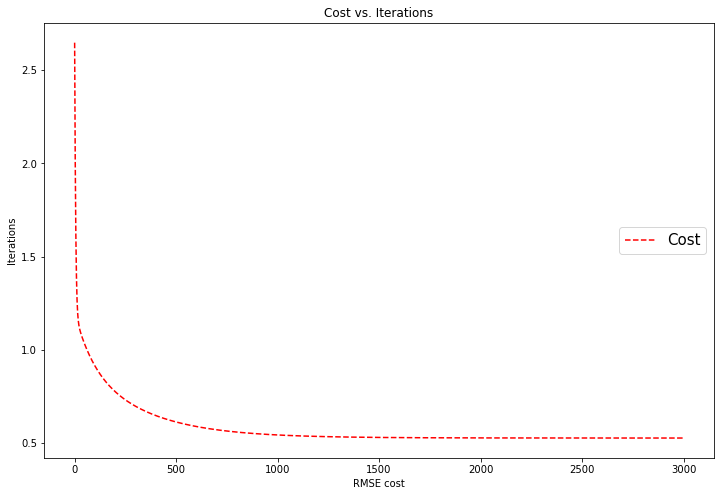

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.plot(costs,'r--')
plt.legend(['Cost'], loc=5,prop={'size': 15})
plt.title("Cost vs. Iterations")
plt.xlabel("RMSE cost")
plt.ylabel("Iterations")
plt.show()

### Predicting the model output on test dataset

In [41]:
y_pred_train = output_lin_reg(np.c_[np.ones(X_train.shape[0]),X_train], theta)

In [42]:
pd.DataFrame(np.c_[y_train, y_pred_train], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,6.560497,5.805501
1,3.989030,3.358891
2,5.790067,5.324795
3,4.237543,3.381819
4,3.700252,4.216892
...,...,...
169115,3.497189,4.406280
169116,6.237089,6.003363
169117,3.929126,3.290151
169118,6.783444,5.286291


In [43]:
rmse_cost(y_train, y_pred_train)

0.5272002042389978

In [44]:
y_pred_test = output_lin_reg(np.c_[np.ones(X_test.shape[0]),X_test], theta)

In [45]:
pd.DataFrame(np.c_[y_test, y_pred_test], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,5.008065,5.155649
1,4.226213,3.741866
2,5.422624,5.279745
3,3.806718,1.860283
4,3.828043,3.977924
...,...,...
72475,5.280064,5.050970
72476,3.382694,4.263414
72477,5.057026,5.047071
72478,3.369449,4.472287


In [46]:
mse_cost(y_test, y_pred_test)

0.28295852466997395

In [47]:
rmse_cost(y_test, y_pred_test)

0.5319384594762574

### Verifying  Linear Regression by in-built function python library Scikit-Learn (sklearn)

In [502]:
from sklearn.linear_model import LinearRegression 

In [503]:
model = LinearRegression().fit(X_train, y_train)

In [504]:
model.coef_

array([ 1.49603534,  1.17666805,  0.19430309, -1.36425291, -1.31630924,
        0.00237843,  0.00241028, -0.02858436, -0.06677159, -0.16296899,
       -0.13111575, -0.0190378 , -0.19088562, -0.04582365])

In [505]:
model.intercept_

3.886680436144247

In [506]:
y_pred_test = model.predict(X_test)

In [507]:
y_pred_train = model.predict(X_train)

In [508]:
pd.DataFrame(np.c_[y_train, y_pred_train], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,6.560497,5.806932
1,3.989030,3.363696
2,5.790067,5.327364
3,4.237543,3.380619
4,3.700252,4.215362
...,...,...
169115,3.497189,4.415848
169116,6.237089,6.011980
169117,3.929126,3.288149
169118,6.783444,5.287987


In [509]:
pd.DataFrame(np.c_[y_test, y_pred_test], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,5.008065,5.148459
1,4.226213,3.731818
2,5.422624,5.289826
3,3.806718,1.844187
4,3.828043,3.972838
...,...,...
72475,5.280064,5.043605
72476,3.382694,4.251136
72477,5.057026,5.042059
72478,3.369449,4.461297


In [510]:
mse_cost(y_test, y_pred_test)

0.282950621267968

In [511]:
rmse_cost(y_test, y_pred_test)

0.5319310305556239

In [512]:
rmse_cost(y_train, y_pred_train)

0.5271718204707763